### QDA
- likelihood를 다변수 가우시안 정규분포로 가정한다.
- 이렇게 되면 x 데이터가 주어졌을 때 k클래스에 속할 확률을 구할 수 있다.(조건부 확률)
- predict시 0,1,2...클래스번호로 나옴.

##### 예시
- P(Y=1)=P(Y=2)=P(Y=3)=1/3 이라 가정
- 각 클래스의 모수가 아래와 같다고 가정하자

In [1]:
N = 100
np.random.seed(0)

x1 = sp.stats.multivariate_normal(mean=[0,0], cov=[[0.7,0],[0,0.7]]).rvs(100)
x2 = sp.stats.multivariate_normal(mean=[1,1], cov=[[0.8,0.2],[0.2,0.8]]).rvs(100)
x3 = sp.stats.multivariate_normal(mean=[-1,1], cov=[[0.8,0.2],[0.2,0.8]]).rvs(100)

y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)

In [15]:
x = np.vstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])

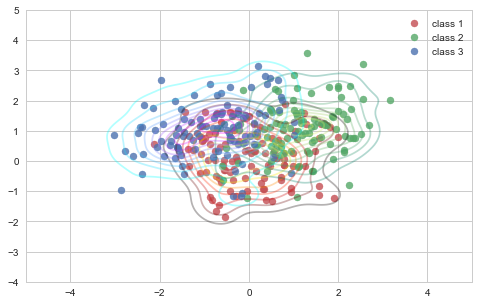

In [16]:
plt.figure(figsize=(8,5))

plt.scatter(x1[:,0], x1[:,1], alpha=0.8, s=50, c='r', label="class 1")
plt.scatter(x2[:,0], x2[:,1], alpha=0.8, s=50, c='g', label="class 2")
plt.scatter(x3[:,0], x3[:,1], alpha=0.8, s=50, c='b', label="class 3")

sns.kdeplot(x1[:,0], x1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(x2[:,0], x2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(x3[:,0], x3[:,1], alpha=0.3, cmap=mpl.cm.cool)

plt.xlim(-5,5)
plt.ylim(-4,5)

plt.legend()
plt.show()

### QDA in scikit-learn

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [18]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(x,y)

In [19]:
qda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

위쪽에서 설정했던 값 (0,0), (1,1), (-1,1)들과 유사하게 나온다.

In [25]:
for i in range(3):
    print("class " + str(i) +"covariance : \n" ,qda.covariance_[i])

class 0covariance : 
 [[ 0.73846319 -0.01762041]
 [-0.01762041  0.72961278]]
class 1covariance : 
 [[ 0.66534246  0.21132313]
 [ 0.21132313  0.78806006]]
class 2covariance : 
 [[ 0.9351386   0.22880955]
 [ 0.22880955  0.79142383]]


covariance matrix 역시 비슷...하다..?..조금 차이를 보이긴 한다..

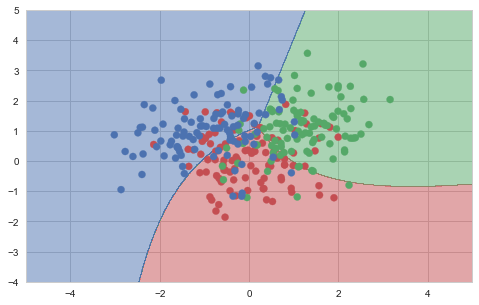

In [40]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5

plt.figure(figsize=(8,5))

xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                    np.arange(ymin, ymax, (ymax-ymin)/1000))
zz = np.reshape(qda.predict(np.array([xx.ravel(), yy.ravel()]).T), xx.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r','g','b']).as_hex())

plt.contourf(xx, yy, zz, cmap=cmap, alpha=0.5) # 라인 그린건가...?
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap=cmap)
plt.show()

### LDA
- QDA와의 차이는 각 클래스 공분산행렬이 동일하다고 본다는 것
- 결과적으론, 클래스간 경계선이 선형을 이룬다.
- QDA와 마찬가지로 predict시 0,1,2...클래스번호로 나옴.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
lda = LinearDiscriminantAnalysis(n_components=3, solver='svd', store_covariance=True).fit(x,y)

In [43]:
lda.covariance_

array([[ 0.7718516 ,  0.13942905],
       [ 0.13942905,  0.7620019 ]])

클래스별 공통 공분산 행렬이 나온다

In [44]:
lda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

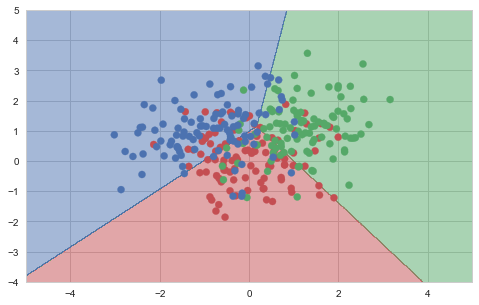

In [53]:
plt.figure(figsize=(8,5))

xmin, xmax = -5, 5
ymin, ymax = -4, 5

xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                    np.arange(ymin, ymax, (ymax-ymin)/1000))
zz = np.reshape(lda.predict(np.array([xx.ravel(), yy.ravel()]).T), xx.shape)

cmap = mpl.colors.ListedColormap(sns.color_palette(["r","g","b"]).as_hex())

plt.contourf(xx, yy, zz, cmap=cmap, alpha=0.5)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap=cmap)
plt.show()

클래스간 경계선이 직선의 형태로 나오는 것을 볼 수 있다. 

#### quiz
1. QDA와 LDA를 사용하여 붓꽃 분류 문제를 풀고 성능을 confusion matrix와 classification report를 구하여 비교한다.
2. 두 모형에 대해 (각 클래스에 대한 OvR 문제의) ROC 커브를 그린다.

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()

In [58]:
x = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(data=iris.target, columns=["species"], dtype='category')

In [59]:
df = pd.concat([x,y], axis=1)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


굳이 dataframe에 안넣고 돌려도 됨..(오히려 깔끔하게 돌아감)

In [67]:
qda1 = QuadraticDiscriminantAnalysis(store_covariance=True).fit(iris.data, iris.target)

In [69]:
qda_predict = qda1.predict(iris.data)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
confusion_matrix(iris.target, qda_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [72]:
print(classification_report(iris.target, qda_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [73]:
lda1 = LinearDiscriminantAnalysis(n_components=3, solver='svd', store_covariance=True).fit(iris.data, iris.target)

In [74]:
lda_predict = lda1.predict(iris.data)

In [75]:
confusion_matrix(iris.target, lda_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [76]:
print(classification_report(iris.target, lda_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [77]:
from sklearn.metrics import roc_curve

In [78]:
fpr1, tpr1, thresholds1 = roc_curve(iris.target, qda1.predict_proba(iris.data))

ValueError: multiclass format is not supported

##### multi-class에선 ROC커브를 그릴 수 없다.   
##### OvR 문제를 가정하여 각각의 OvR 문제에 대해 ROC 커브를 그린다

In [81]:
from sklearn.preprocessing import label_binarize

In [82]:
y = label_binarize(iris.target, [0, 1, 2])
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

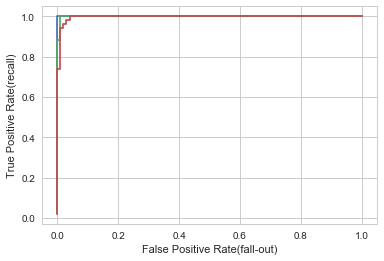

In [92]:
fpr1 = [None] * 3
tpr1 = [None] * 3
thresholds1 = [None] * 3

for i in range(3):
    model1 = QuadraticDiscriminantAnalysis(store_covariance=True).fit(iris.data,y[:,i])
    fpr1[i], tpr1[i], thresholds1[i] = roc_curve(y[:,i], model1.predict_proba(iris.data)[:,1])
    plt.plot(fpr1[i], tpr1[i])

plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.show()

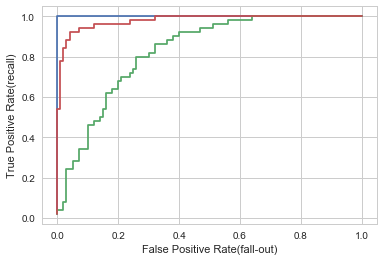

In [94]:
fpr2 = [None] * 3
tpr2 = [None] * 3
thresholds2 = [None] * 3

for i in range(3):
    model2 = LinearDiscriminantAnalysis(n_components=3, store_covariance=True).fit(iris.data,y[:,i])
    fpr2[i], tpr2[i], thresholds2[i] = roc_curve(y[:,i], model2.predict_proba(iris.data)[:,1])
    plt.plot(fpr2[i], tpr2[i])

plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")
plt.show()

너무 차이가 심한데...뭐지..